In [1]:
!pip install matplotlib

     |████████████████████████████████| 7.2 MB 5.1 MB/s            
     |████████████████████████████████| 59 kB 6.7 MB/s             
     |████████████████████████████████| 2.7 MB 14.2 MB/s            
     |████████████████████████████████| 890 kB 10.6 MB/s            


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import glob
import os

In [3]:
# Class map
class_map = {
    0: 'Airplane',
    1: 'Autombile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck',
}

In [7]:
# Read the test data
test_images = glob.glob(os.path.join("test_data", "*"))
print(test_images)

['test_data/dog.jpg', 'test_data/horse.jpg', 'test_data/ship.jpg', 'test_data/deer.jpg', 'test_data/bird.jpg', 'test_data/automobile.jpg', 'test_data/airplane.png', 'test_data/cat.jpg', 'test_data/frog.jpg', 'test_data/truck.png']


In [8]:
# Load the model
model = tf.saved_model.load("saved_models/vgg_cifar")
inputs = tf.random.uniform((1, 32, 32, 3))
out = model(inputs)

2022-01-10 06:15:38.711211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-10 06:15:38.711747: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2022-01-10 06:15:39.565590: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-10 06:15:39.566527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [13]:
# Read image -> reshape + normalise -> convert to tensor -> predict output
# Dictionary to hold the prediction and its class
img_class_tup = list()

for filename in test_images:
    # load the image
    img = Image.open(filename)
    if img.mode == "RGBA":
        # remove the alpha channel
        img = img.convert("RGB")
        
    # reshape the image
    img = np.expand_dims(np.array(img.resize((32, 32))) / 255.0, 0)
    # Remove the alpha channel if exists
    
    # convert to a tensor
    img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
    # infer the model
    prediction = model(img_tensor)
    prediction_class = tf.math.argmax(prediction, 1)[0].numpy()
    img_class_tup.append((prediction_class, img.squeeze(0)))

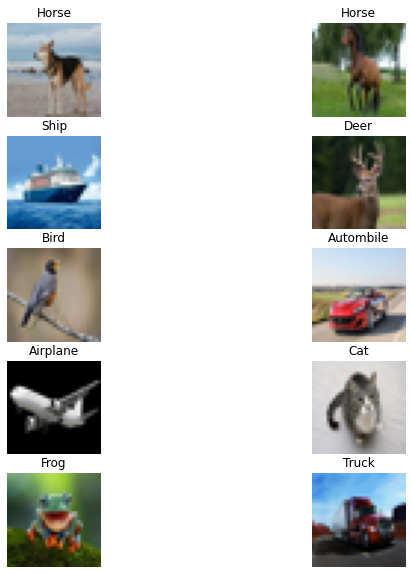

In [14]:
plt.figure(figsize=(10, 10))
for n in range(10):
    ax = plt.subplot(5, 2, n + 1)
    # print(image_batch[n].shape)
    plt.imshow(np.uint8(img_class_tup[n][1] * 255.0))
    plt.title(class_map[img_class_tup[n][0]])
    plt.axis("off")